# Wind farm SCADA analysis

This jupyter (lab) notebook explores some of the analysis that can be done with wind farm SCADA data. It uses the following datasets, which have been published by Cubico Sustainable Investments Ltd under under a CC-BY-4.0 open data license:

Plumley, Charlie. (2022). Kelmarsh wind farm data (0.0.2) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.5841834

Plumley, Charlie. (2022). Penmanshiel Wind Farm Data (0.0.1) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.5946808

## Import libraries

In [1]:
import glob
import re
import numpy as np
import pandas as pd
import xarray as xr
import scipy
import matplotlib.pyplot as plt

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, NumeralTickFormatter, HoverTool


In [2]:
output_notebook()

Loading BokehJS ...

## Load data

Visit the Kelmarsh repository on Zenodo and download the data manually, then place it in the "data/Kelmarsh/Zenodo" repository. Unzip everthing into the same repository. Then you are ready to go!

### Find all the turbine SCADA data files

In [3]:
SCADA_files = glob.glob('data\Kelmarsh\Zenodo\Turbine_Data*.csv')

In [4]:
csv_params = {'index_col':0,'skiprows':2, 'nrows':4, 'delimiter':': ','header':None, 'engine':'python'}

SCADA_headers = pd.concat((pd.read_csv(f,**csv_params).rename(columns={1:f}) for f in SCADA_files),axis=1)

SCADA_headers.index = SCADA_headers.index.str.replace('# ','')

SCADA_headers = SCADA_headers.transpose()

SCADA_headers = SCADA_headers.reset_index().rename(columns={'index':'File'})

In [35]:
SCADA_headers

0                                                File     Turbine  \
0   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_1_2...  Kelmarsh 1   
1   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_1_2...  Kelmarsh 1   
2   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_1_2...  Kelmarsh 1   
3   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_1_2...  Kelmarsh 1   
4   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_1_2...  Kelmarsh 1   
5   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_1_2...  Kelmarsh 1   
6   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_2_2...  Kelmarsh 2   
7   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_2_2...  Kelmarsh 2   
8   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_2_2...  Kelmarsh 2   
9   data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_2_2...  Kelmarsh 2   
10  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_2_2...  Kelmarsh 2   
11  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_2_2...  Kelmarsh 2   
12  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_3_2...  Kelmarsh 3   
13  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_3_2...  Kelmarsh 3   
14  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_3_2...  Kelmarsh 3   
15  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_3_2...  Kelmarsh 3   
16  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_3_2...  Kelmarsh 3   
17  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_3_2...  Kelmarsh 3   
18  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_4_2...  Kelmarsh 4   
19  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_4_2...  Kelmarsh 4   
20  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_4_2...  Kelmarsh 4   
21  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_4_2...  Kelmarsh 4   
22  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_4_2...  Kelmarsh 4   
23  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_4_2...  Kelmarsh 4   
24  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_5_2...  Kelmarsh 5   
25  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_5_2...  Kelmarsh 5   
26  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_5_2...  Kelmarsh 5   
27  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_5_2...  Kelmarsh 5   
28  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_5_2...  Kelmarsh 5   
29  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_5_2...  Kelmarsh 5   
30  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_6_2...  Kelmarsh 6   
31  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_6_2...  Kelmarsh 6   
32  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_6_2...  Kelmarsh 6   
33  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_6_2...  Kelmarsh 6   
34  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_6_2...  Kelmarsh 6   
35  data\Kelmarsh\Zenodo\Turbine_Data_Kelmarsh_6_2...  Kelmarsh 6   

0   Turbine type Time zone                                      Time interval  
0   Senvion MM92       UTC  2016-01-01 00:00:00 - 2017-01-01 00:00:00 (366...  
1   Senvion MM92       UTC  2017-01-01 00:00:00 - 2018-01-01 00:00:00 (365...  
2   Senvion MM92       UTC  2018-01-01 00:00:00 - 2019-01-01 00:00:00 (365...  
3   Senvion MM92       UTC  2019-01-01 00:00:00 - 2020-01-01 00:00:00 (365...  
4   Senvion MM92       UTC  2020-01-01 00:00:00 - 2021-01-01 00:00:00 (366...  
5   Senvion MM92       UTC  2021-01-01 00:00:00 - 2021-07-01 00:00:00 (181...  
6   Senvion MM92       UTC  2016-01-01 00:00:00 - 2017-01-01 00:00:00 (366...  
7   Senvion MM92       UTC  2017-01-01 00:00:00 - 2018-01-01 00:00:00 (365...  
8   Senvion MM92       UTC  2018-01-01 00:00:00 - 2019-01-01 00:00:00 (365...  
9   Senvion MM92       UTC  2019-01-01 00:00:00 - 2020-01-01 00:00:00 (365...  
10  Senvion MM92       UTC  2020-01-01 00:00:00 - 2021-01-01 00:00:00 (366...  
11  Senvion MM92       UTC  2021-01-01 00:00:00 - 2021-07-01 00:00:00 (181...  
12  Senvion MM92       UTC  2016-01-01 00:00:00 - 2017-01-01 00:00:00 (366...  
13  Senvion MM92       UTC  2017-01-01 00:00:00 - 2018-01-01 00:00:00 (365...  
14  Senvion MM92       UTC  2018-01-01 00:00:00 - 2019-01-01 00:00:00 (365...  
15  Senvion MM92       UTC  2019-01-01 00:00:00 - 2020-01-01 00:00:00 (365...  
16  Senvion MM92       UTC  2020-01-01 00:00:00 - 2021-01-01 00:00:00 (366...  
17  Se

### Check what signals are available

In [6]:
csv_params = {'index_col':'# Date and time','parse_dates':True,'skiprows':9}

signals = pd.read_csv(SCADA_files[0],**csv_params).columns

In [7]:
for signal in signals:
    print(signal)

Wind speed (m/s)
Wind speed, Standard deviation (m/s)
Wind speed, Minimum (m/s)
Wind speed, Maximum (m/s)
Long Term Wind (m/s)
Wind speed Sensor 1 (m/s)
Wind speed Sensor 1, Standard deviation (m/s)
Wind speed Sensor 1, Minimum (m/s)
Wind speed Sensor 1, Maximum (m/s)
Wind speed Sensor 2 (m/s)
Wind speed Sensor 2, Standard deviation (m/s)
Wind speed Sensor 2, Minimum (m/s)
Wind speed Sensor 2, Maximum (m/s)
Density adjusted wind speed (m/s)
Wind direction (°)
Nacelle position (°)
Wind direction, Standard deviation (°)
Wind direction, Minimum (°)
Wind direction, Maximum (°)
Nacelle position, Standard deviation (°)
Nacelle position, Minimum (°)
Nacelle position, Maximum (°)
Vane position 1+2 (°)
Vane position 1+2, Max (°)
Vane position 1+2, Min (°)
Vane position 1+2, StdDev (°)
Energy Export (kWh)
Energy Export counter (kWh)
Energy Import (kWh)
Energy Import counter (kWh)
Lost Production (Contractual) (kWh)
Lost Production (Time-based IEC B.2.2) (kWh)
Lost Production (Time-based IEC B.2.

### Select only relevant signals and create a dataframe

In [8]:
usecolumns = ['# Date and time', 'Wind speed (m/s)','Wind speed, Standard deviation (m/s)', 'Wind speed, Minimum (m/s)',
            'Wind speed, Maximum (m/s)','Wind direction (°)','Nacelle position (°)','Energy Export (kWh)','Power (kW)',
            'Reactive power (kvar)','Rotor speed (RPM)','Generator RPM (RPM)','Nacelle ambient temperature (°C)',
            'Blade angle (pitch position) A (°)','Blade angle (pitch position) B (°)','Blade angle (pitch position) C (°)',
            'Lost Production to Curtailment (Total) (kWh)','Lost Production to Downtime (kWh)','Metal particle count counter',
            'Front bearing temperature (°C)','Rear bearing temperature (°C)']

In [9]:
#column_names = [re.sub('[^a-zA-Z_]','',re.sub(' ','_',column)).strip('_') for column in usecolumns]

In [10]:
csv_params = {'index_col':'# Date and time','parse_dates':True,'skiprows':9,'usecols':usecolumns}

SCADA_lst = list()
for turbine in SCADA_headers['Turbine'].unique():
    SCADA_wt = pd.concat((pd.read_csv(f,**csv_params) for f in list(SCADA_headers.loc[SCADA_headers['Turbine'] == turbine]['File'])))
    #SCADA_wt.columns = column_names[1:]
    SCADA_wt['Turbine'] = turbine
    SCADA_wt.index.names = ['Timestamp']
    SCADA_lst.append(SCADA_wt.copy())

SCADA = pd.concat(SCADA_lst)

In [11]:
SCADA

Wind speed (m/s)  Wind speed, Standard deviation (m/s)  \
Timestamp                                                                     
2016-01-03 00:00:00               NaN                                   NaN   
2016-01-03 00:10:00               NaN                                   NaN   
2016-01-03 00:20:00               NaN                                   NaN   
2016-01-03 00:30:00               NaN                                   NaN   
2016-01-03 00:40:00               NaN                                   NaN   
...                               ...                                   ...   
2021-06-30 23:10:00              3.17                                  0.40   
2021-06-30 23:20:00              3.64                                  0.34   
2021-06-30 23:30:00              3.53                                  0.35   
2021-06-30 23:40:00              3.10                                  0.35   
2021-06-30 23:50:00              2.36                                  0.30   

                     Wind speed, Minimum (m/s)  Wind speed, Maximum (m/s)  \
Timestamp                                                                   
2016-01-03 00:00:00                        NaN                        NaN   
2016-01-03 00:10:00                        NaN                        NaN   
2016-01-03 00:20:00                        NaN                        NaN   
2016-01-03 00:30:00                        NaN                        NaN   
2016-01-03 00:40:00                        NaN                        NaN   
...                                        ...                        ...   
2021-06-30 23:10:00                       1.76                       4.21   
2021-06-30 23:20:00                       2.64                       4.74   
2021-06-30 23:30:00                       2.38                       4.58   
2021-06-30 23:40:00                       1.85                       4.29   
2021-06-30 23:50:00                       1.27                       3.30   

                     Wind direction (°)  Nacelle position (°)  \
Timestamp                                                       
2016-01-03 00:00:00                 NaN                   NaN   
2016-01-03 00:10:00                 NaN                   NaN   
2016-01-03 00:20:00                 NaN                   NaN   
2016-01-03 00:30:00                 NaN                   NaN   
2016-01-03 00:40:00                 NaN                   NaN   
...                                 ...                   ...   
2021-06-30 23:10:00           33.330002             34.240002   
2021-06-30 23:20:00           33.540001             34.240002   
2021-06-30 23:30:00           36.900002             34.240002   
2021-06-30 23:40:00           29.350000             34.240002   
2021-06-30 23:50:00           29.740000             34.240002   

                     Energy Export (kWh)  Lost Production to Downtime (kWh)  \
Timestamp                                                                     
2016-01-03 00:00:00                  NaN                                NaN   
2016-01-03 00:10:00                  NaN                                NaN   
2016-01-03 00:20:00                  NaN                                NaN   
2016-01-03 00:30:00                  NaN                                NaN   
2016-01-03 00:40:00                  NaN                                NaN   
...                                  ...                                ...   
2021-06-30 23:10:00                  0.0                                0.0   
2021-06-30 23:20:00                 10.0                                0.0   
2021-06-30 23:30:00                  7.0                                0.0   
2021-06-30 23:40:00                  3.0                                0.0   
2021-06-30 23:50:00                  0.0                                0.0   

                     Lost Production to Curtailment (Total) (kWh)  Power (kW)  \
Timestamp                           

### Export the data to csv

In [12]:
SCADA.to_csv('Kelmarsh_OpenOA_SCADA.csv')

### Convert to a multilevel dataframe

In [13]:
SCADA_multi = SCADA.set_index([SCADA.index, 'Turbine'])

In [14]:
#SCADA_ds = SCADA_multi.to_xarray()

In [15]:
#SCADA_ds.sel(Turbine='Kelmarsh 1')

In [16]:
#SCADA_ds.to_netcdf('SCADA.nc',format='NETCDF4')

In [17]:
#SCADA_multi.loc[(slice(None), 'Kelmarsh 1'), :]

## Basic Analysis

Explore some of the available signals

### Monthly Generation

In [32]:
monthly_production = SCADA['Energy Export (kWh)'].resample('1MS').sum()/1000

<AxesSubplot:xlabel='Timestamp'>

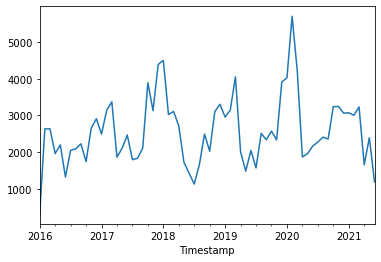

In [33]:
monthly_production.plot()

### Power Curve

In [20]:
SCADA_K1 = SCADA_multi.loc[(slice(None), 'Kelmarsh 1'), :]
SCADA_K2 = SCADA_multi.loc[(slice(None), 'Kelmarsh 2'), :]
SCADA_K3 = SCADA_multi.loc[(slice(None), 'Kelmarsh 3'), :]
SCADA_K4 = SCADA_multi.loc[(slice(None), 'Kelmarsh 4'), :]
SCADA_K5 = SCADA_multi.loc[(slice(None), 'Kelmarsh 5'), :]
SCADA_K6 = SCADA_multi.loc[(slice(None), 'Kelmarsh 6'), :]

In [21]:
bin_data = SCADA_K1[['Wind speed (m/s)','Power (kW)']]

In [22]:
bins = range(0,25,1)
bin_data['binned'] = pd.cut(bin_data['Wind speed (m/s)'], bins)
grouped = bin_data.groupby('binned').median()

C:\Users\Charlie\AppData\Local\Temp\ipykernel_13624\285361832.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['binned'] = pd.cut(bin_data['Wind speed (m/s)'], bins)


In [34]:
# output to static HTML file
p = figure(width=800, height=500)

# add a circle renderer with a size, color, and alpha
p.circle(SCADA_K1['Wind speed (m/s)'], SCADA_K1['Power (kW)'], size=4, color='navy', alpha=0.1)

p.line(grouped['Wind speed (m/s)'], grouped['Power (kW)'],color='red')

p.xaxis.axis_label = 'Wind speed (m/s)'
p.yaxis.axis_label = 'Power (kW)'

# show the results
show(p)

### Turbine Control

In [25]:
def bin_rpm_power(bin_data):
    
    #bin_data = SCADA_K1[['Generator RPM (RPM)','Power (kW)']]

    bins = range(800,1900,50)
    bin_data['binned'] = pd.cut(bin_data['Generator RPM (RPM)'], bins)
    grouped = bin_data.groupby('binned').median()
    
    return grouped

In [26]:
def bin_wind_power(bin_data):
    
    #bin_data = SCADA_K1[['Generator RPM (RPM)','Power (kW)']]

    bins = np.arange(0,7,0.1)
    bin_data['binned'] = pd.cut(bin_data['Wind speed (m/s)'], bins)
    grouped = bin_data.groupby('binned').median()
    
    return grouped

In [27]:
grouped1 = bin_rpm_power(SCADA_K1[['Generator RPM (RPM)','Power (kW)']])
grouped2 = bin_rpm_power(SCADA_K2[['Generator RPM (RPM)','Power (kW)']])
grouped3 = bin_rpm_power(SCADA_K3[['Generator RPM (RPM)','Power (kW)']])
grouped4 = bin_rpm_power(SCADA_K4[['Generator RPM (RPM)','Power (kW)']])
grouped5 = bin_rpm_power(SCADA_K5[['Generator RPM (RPM)','Power (kW)']])
grouped6 = bin_rpm_power(SCADA_K6[['Generator RPM (RPM)','Power (kW)']])

grouped01 = bin_wind_power(SCADA_K1[['Wind speed (m/s)','Power (kW)']])
grouped02 = bin_wind_power(SCADA_K2[['Wind speed (m/s)','Power (kW)']])
grouped03 = bin_wind_power(SCADA_K3[['Wind speed (m/s)','Power (kW)']])
grouped04 = bin_wind_power(SCADA_K4[['Wind speed (m/s)','Power (kW)']])
grouped05 = bin_wind_power(SCADA_K5[['Wind speed (m/s)','Power (kW)']])
grouped06 = bin_wind_power(SCADA_K6[['Wind speed (m/s)','Power (kW)']])

C:\Users\Charlie\AppData\Local\Temp\ipykernel_13624\763296443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['binned'] = pd.cut(bin_data['Generator RPM (RPM)'], bins)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_13624\763296443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bin_data['binned'] = pd.cut(bin_data['Generator RPM (RPM)'], bins)
C:\Users\Charlie\AppData\Local\Temp\ipykernel_13624\763296443.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [28]:
# output to static HTML file
p = figure(width=800, height=500)

# add a circle renderer with a size, color, and alpha
#p.circle(SCADA_K1['Generator RPM (RPM)'], SCADA_K1['Power (kW)'], size=4, color='navy', alpha=0.1)

p.line(grouped1['Generator RPM (RPM)'], grouped1['Power (kW)'],color='blue',legend_label='Kelmarsh 1')
p.line(grouped2['Generator RPM (RPM)'], grouped2['Power (kW)'],color='blue',legend_label='Kelmarsh 2')
p.line(grouped3['Generator RPM (RPM)'], grouped3['Power (kW)'],color='red',legend_label='Kelmarsh 3')
p.line(grouped4['Generator RPM (RPM)'], grouped4['Power (kW)'],color='blue',legend_label='Kelmarsh 4')
p.line(grouped5['Generator RPM (RPM)'], grouped5['Power (kW)'],color='blue',legend_label='Kelmarsh 5')
p.line(grouped6['Generator RPM (RPM)'], grouped6['Power (kW)'],color='red',legend_label='Kelmarsh 6')

p.legend.location = 'left'

p.xaxis.axis_label = 'Generator (RPM)'
p.yaxis.axis_label = 'Power (kW)'

# show the results
show(p)

In [29]:
# output to static HTML file
p = figure(width=800, height=500)

# add a circle renderer with a size, color, and alpha
#p.circle(SCADA_K1['Generator RPM (RPM)'], SCADA_K1['Power (kW)'], size=4, color='navy', alpha=0.1)

p.line(grouped01['Wind speed (m/s)'], grouped01['Power (kW)'],color='blue',legend_label='Kelmarsh 1')
p.line(grouped02['Wind speed (m/s)'], grouped02['Power (kW)'],color='blue',legend_label='Kelmarsh 2')
p.line(grouped03['Wind speed (m/s)'], grouped03['Power (kW)'],color='red',legend_label='Kelmarsh 3')
p.line(grouped04['Wind speed (m/s)'], grouped04['Power (kW)'],color='blue',legend_label='Kelmarsh 4')
p.line(grouped05['Wind speed (m/s)'], grouped05['Power (kW)'],color='blue',legend_label='Kelmarsh 5')
p.line(grouped06['Wind speed (m/s)'], grouped06['Power (kW)'],color='red',legend_label='Kelmarsh 6')

p.legend.location = 'left'

# show the results
show(p)

### Metal Particle Count

In [30]:
particle_count1 = SCADA_K1['Metal particle count counter'].reset_index().set_index('Timestamp').drop(columns='Turbine')
particle_count2 = SCADA_K2['Metal particle count counter'].reset_index().set_index('Timestamp').drop(columns='Turbine')
particle_count3 = SCADA_K3['Metal particle count counter'].reset_index().set_index('Timestamp').drop(columns='Turbine')
particle_count4 = SCADA_K4['Metal particle count counter'].reset_index().set_index('Timestamp').drop(columns='Turbine')
particle_count5 = SCADA_K5['Metal particle count counter'].reset_index().set_index('Timestamp').drop(columns='Turbine')
particle_count6 = SCADA_K6['Metal particle count counter'].reset_index().set_index('Timestamp').drop(columns='Turbine')

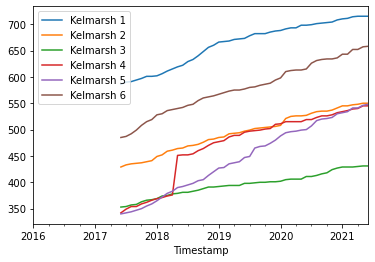

In [31]:
fig, ax = plt.subplots(1, 1)
particle_count1.resample('1M').max().plot(ax=ax)
particle_count2.resample('1M').max().plot(ax=ax)
particle_count3.resample('1M').max().plot(ax=ax)
particle_count4.resample('1M').max().plot(ax=ax)
particle_count5.resample('1M').max().plot(ax=ax)
particle_count6.resample('1M').max().plot(ax=ax)

ax.legend(["Kelmarsh 1","Kelmarsh 2","Kelmarsh 3","Kelmarsh 4","Kelmarsh 5","Kelmarsh 6"]);